<a href="https://colab.research.google.com/github/harshareddy1993/TensorFlow-GettingStarted/blob/master/Getting_Started.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Training a Model

In [4]:
import tensorflow as tf
tf.get_logger().setLevel('ERROR')
import numpy as np

In [6]:
celcius = np.array([-40, -10,  0,  8, 15, 22,  38],  dtype=float)
farenheit = np.array([-40,  14, 32, 46, 59, 72, 100],  dtype=float)

for i,e in enumerate(celcius):
  print("{} C in F is {}".format(e,farenheit[i]))

-40.0 C in F is -40.0
-10.0 C in F is 14.0
0.0 C in F is 32.0
8.0 C in F is 46.0
15.0 C in F is 59.0
22.0 C in F is 72.0
38.0 C in F is 100.0


In [18]:
# Creating a model with a single dense layer called a Dense network.
# The layer l0 is created by instantiating tf.keras.layers.Dense with two parameters: units and input_shape.
# input_shape=[1] specifies the shape of input to the layer as a one dimensional array.
# units=1 describes the number of neurons in the layer. The number of neurons define how many internal variables (weights) the layer has to learn in order to solve the problem.

l0 = tf.keras.layers.Dense(units=1, input_shape=[1])


In [19]:
# Assemble the created layers into the model.

model = tf.keras.Sequential([l0])

Compile the model with loss and optimizer functions.

Before training, the model has to be compiled with loss and optimizer funrcitons.

- Loss Function: A way of measuring how far off predictions of the model are from the desired output.
- Optimizer Function: A way of adjusting internal values in order to reduce the loss funciton.

Notice the 0.1 passed to the optimizer is called learning rate. This tells tensor flow how aggressively it should try to find the best model

In [20]:
model.compile(loss='mean_squared_error', optimizer=tf.keras.optimizers.Adam(0.1))

Train the model by calling fit method.

During the training process, the model takes in Celsius values and performs a calculation using the internal variables (weights) and outputs the values which are meant to be in Farenheit. Since the initial weights are set in random, the output will be far off from the expected output. The loss function calculates the difference between initial and expected output and the optimizer function directs how the weights are to be adjusted.

This cycle of calculate, compare and adjust is controlled by the fit method. The first argument are the inputs to the model and the second argument are the desired outputs. The epochs argument specifies the number of times this cycle is to be run for each input-output combination.

In [21]:
training_stats = model.fit(celcius, farenheit, epochs=500, verbose= 0)
print("Finished training the model")

Finished training the model


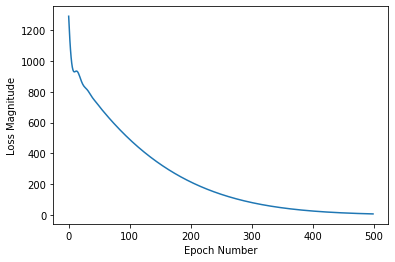

In [22]:
import matplotlib.pyplot as plt

plt.xlabel('Epoch Number')
plt.ylabel('Loss Magnitude')

plt.plot(training_stats.history['loss'])

In [23]:
# Predicting values using the trained model.

model.predict([100.0])

array([[211.3382]], dtype=float32)

To summarize, this notebook created a training model with a single dense layer. This model was trained with 3500 examples (7 input-output combinations over 500 epochs).

In [24]:
print("Internal variables (weights) of the layer: {}".format(l0.get_weights()))

Internal variables (weights) of the layer: [array([[1.8204046]], dtype=float32), array([29.297724], dtype=float32)]
